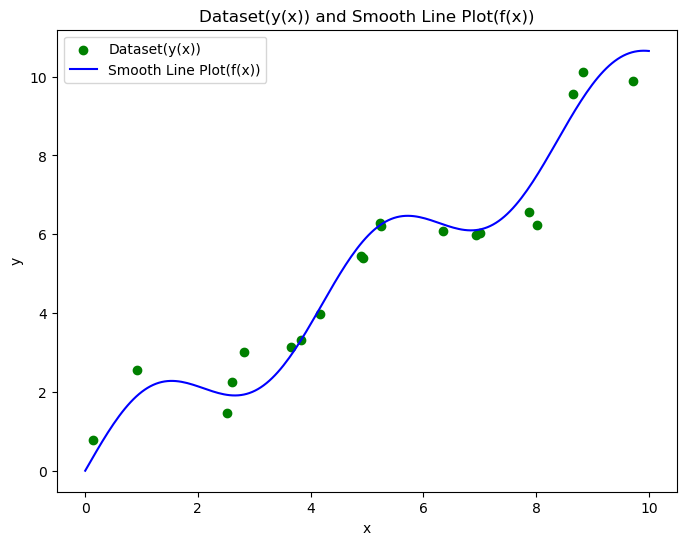

In [5]:
# Problem 1, Part 2
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x + np.sin(1.5 * x)

x = np.random.uniform(0, 10, 20)
epsilon = np.random.normal(0, np.sqrt(0.3), size=20)
y = f(x) + epsilon

x_line = np.linspace(0, 10, 200)
y_line = f(x_line)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="green", label="Dataset(y(x))")
plt.plot(x_line, y_line, color="blue", label="Smooth Line Plot(f(x))")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset(y(x)) and Smooth Line Plot(f(x))")
plt.legend()
plt.show()

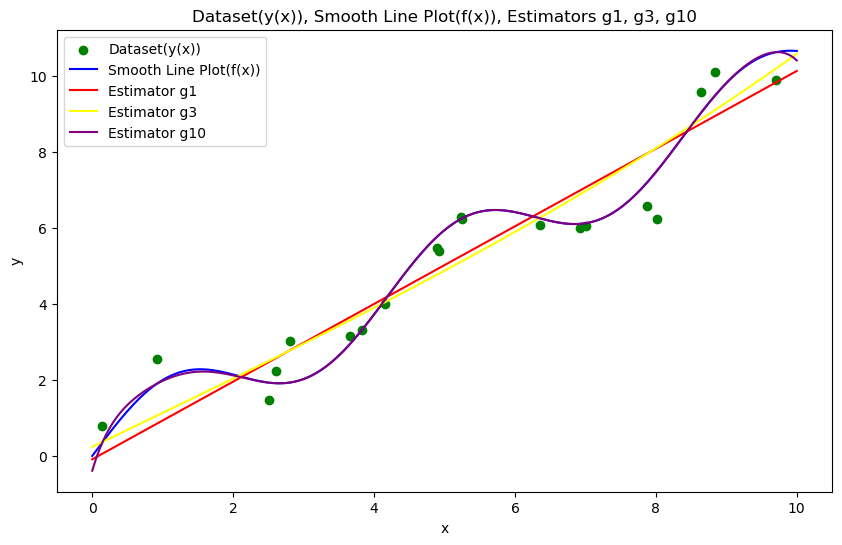

In [6]:
# Problem 1, Part 3
no_noise_y = f(x)
coefs_1 = np.polyfit(x, no_noise_y, deg=1)
coefs_3 = np.polyfit(x, no_noise_y, deg=3)
coefs_10 = np.polyfit(x, no_noise_y, deg=10)

g_1 = np.poly1d(coefs_1)
g_3 = np.poly1d(coefs_3)
g_10 = np.poly1d(coefs_10)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="green", label="Dataset(y(x))")
plt.plot(x_line, y_line, color="blue", label="Smooth Line Plot(f(x))")
plt.plot(x_line, g_1(x_line), color="red", label="Estimator g1")
plt.plot(x_line, g_3(x_line), color="yellow", label="Estimator g3")
plt.plot(x_line, g_10(x_line), color="purple", label="Estimator g10")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset(y(x)), Smooth Line Plot(f(x)), Estimators g1, g3, g10")
plt.legend()
plt.show()

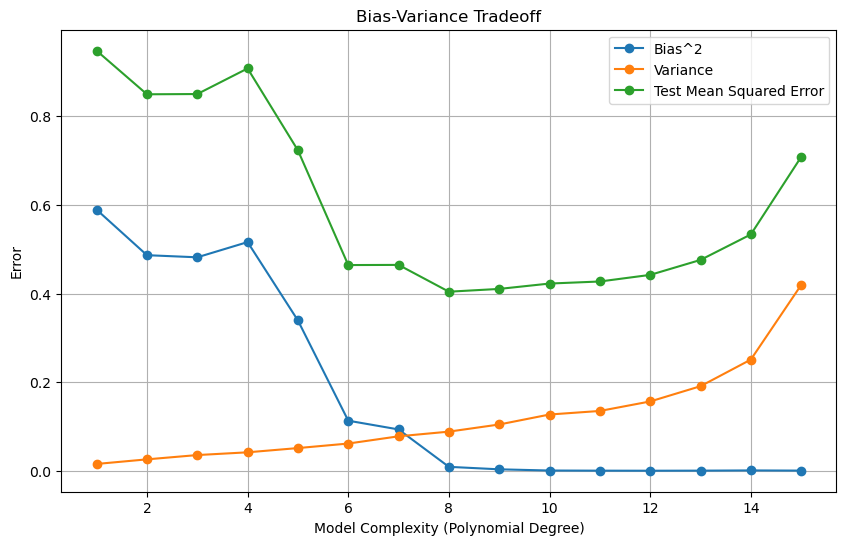

In [10]:
# Problem 1, Part 4
import collections
from sklearn.model_selection import train_test_split

n_datasets = 100
n_samples = 50
degrees = range(1, 16)

x = np.random.uniform(0, 10, 50)
x_train = x[:40]
x_test = x[40:]

predictions = collections.defaultdict(list)
test_errors = collections.defaultdict(list)

def error_function(pred, actual):
    return (pred - actual) ** 2

for i in range(n_datasets):
    y_train = f(x_train) + np.random.normal(0, np.sqrt(0.3), size=40)
    y_test = f(x_test) + np.random.normal(0, np.sqrt(0.3), size=10)
    
    for d in degrees:
        coefs = np.polyfit(x_train, y_train, deg=d)
        g = np.poly1d(coefs)
        y_hat = g(x_test)
        predictions[d].append(y_hat)
        test_errors[d].append(np.mean(error_function(y_hat, y_test)))

complexity_test_error = []
bias_squared = []
variance = []
for d in degrees:
    complexity_test_error.append(np.mean(test_errors[d]))
    mean_preds = np.mean(predictions[d], axis = 0)
    bias_squared.append(np.mean((mean_preds - f(x_test)) ** 2))
    variance.append(np.mean((predictions[d] - mean_preds) ** 2))

plt.figure(figsize=(10,6))
plt.plot(degrees, bias_squared, label="Bias^2", marker="o")
plt.plot(degrees, variance, label="Variance", marker="o")
plt.plot(degrees, complexity_test_error, label="Test Mean Squared Error", marker="o")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()
    

In [12]:
# Problem 1, Part 5
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

unregularized = make_pipeline(PolynomialFeatures(10), LinearRegression())
regularized = make_pipeline(PolynomialFeatures(10), Ridge(alpha=1.0))

x = np.random.uniform(0, 10, 50)
x_train = x[:40]
x_train = x_train.reshape(40, 1)
x_test = x[40:]
x_test = x_test.reshape(10, 1)

predictions = collections.defaultdict(list)
test_errors = collections.defaultdict(list)

for i in range(n_datasets):
    y_train = f(x_train) + np.random.normal(0, np.sqrt(0.3), size=(40, 1))
    y_test = f(x_test) + np.random.normal(0, np.sqrt(0.3), size=(10, 1))

    unregularized.fit(x_train, y_train)
    y_hat = unregularized.predict(x_test)
    predictions["u"].append(y_hat)
    test_errors["u"].append(np.mean(error_function(y_hat, y_test)))

    regularized.fit(x_train, y_train)
    y_hat = regularized.predict(x_test)
    predictions["r"].append(y_hat)
    test_errors["r"].append(np.mean(error_function(y_hat, y_test)))

complexity_test_error = []
bias_squared = []
variance = []

complexity_test_error_u = np.mean(test_errors["u"])
complexity_test_error_r = np.mean(test_errors["r"])

mean_preds_u = np.mean(predictions["u"], axis = 0)
mean_preds_r = np.mean(predictions["r"], axis = 0)

bias_squared_u = np.mean((mean_preds_u - f(x_test)) ** 2)
bias_squared_r = np.mean((mean_preds_r - f(x_test)) ** 2)

variance_u = np.mean((predictions["u"] - mean_preds_u) ** 2)
variance_r = np.mean((predictions["r"] - mean_preds_r) ** 2)


print("Unregularized, deg=10")
print(f"Bias = {np.sqrt(bias_squared_u):.6f}, Variance = {variance_u:.6f}, Test MSE = {complexity_test_error_u:.6f}")

print("Regularized, deg=10, alpha=1.0")
print(f"Bias = {np.sqrt(bias_squared_r):.6f}, Variance = {variance_r:.6f}, Test MSE = {complexity_test_error_r:.6f}")


/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Use

Unregularized, deg=10
Bias = 0.032598, Variance = 0.071573, Test MSE = 0.380460
Regularized, deg=10, alpha=1.0
Bias = 0.163376, Variance = 0.052070, Test MSE = 0.380136


/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pranavhariharane/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Use

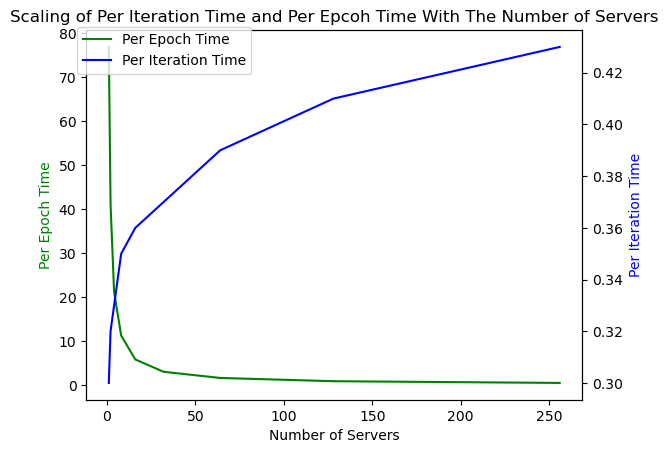

In [13]:
# Problem 2, Part 1
servers = [1, 2, 4, 8, 16, 32, 64, 128, 256]
perIterationTime = [0.3, 0.32, 0.33, 0.35, 0.36, 0.37, 0.39, 0.41, 0.43]
perEpochTime = []
for i in range(9):
    epochTime = (131072 / (64 * 8 * servers[i])) * perIterationTime[i]
    perEpochTime.append(epochTime)

fig, ax1 = plt.subplots()
ax1.plot(servers, perEpochTime, 'g-', label='Per Epoch Time')
ax1.set_xlabel('Number of Servers')
ax1.set_ylabel('Per Epoch Time', color='g')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(servers, perIterationTime, 'b-', label='Per Iteration Time')
ax2.set_ylabel('Per Iteration Time', color='b')
ax2.tick_params(axis='y') 

plt.title('Scaling of Per Iteration Time and Per Epcoh Time With The Number of Servers')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) 
plt.show()

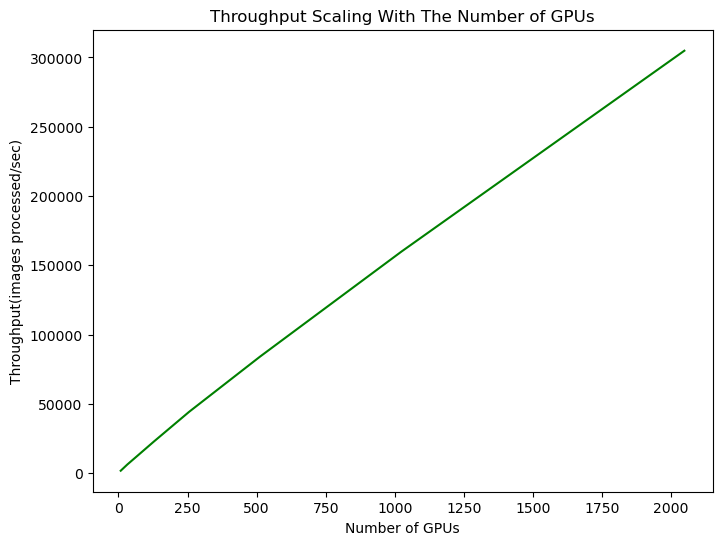

In [14]:
# Problem 2, Part 2
numGpus = []
for elem in servers:
    numGpus.append(elem * 8)
throughputs = []
for i in range(9):
    throughput = 131072 / perEpochTime[i]
    throughputs.append(throughput)

plt.figure(figsize=(8, 6))
plt.plot(numGpus, throughputs, color="green")
plt.xlabel("Number of GPUs")
plt.ylabel("Throughput(images processed/sec)")
plt.title("Throughput Scaling With The Number of GPUs")
plt.show()

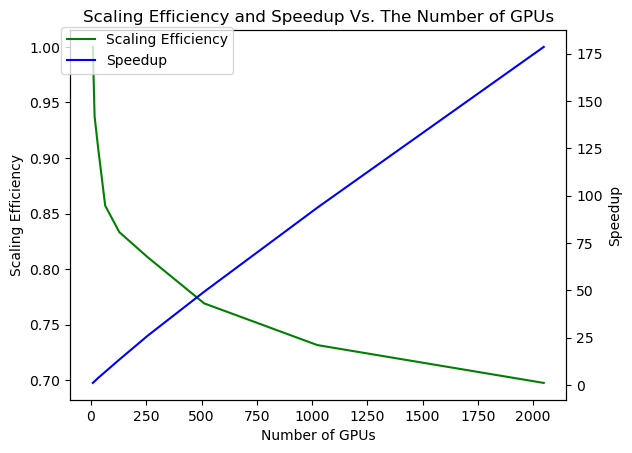

In [15]:
# Problem 2, Part 3
scaling_efficincies = []
speedups = []
for i in range(9):
    scaling_efficincies.append(perIterationTime[0] / perIterationTime[i])
    speedup = servers[i] * scaling_efficincies[-1]
    speedups.append(speedup)

fig, ax1 = plt.subplots()
ax1.plot(numGpus, scaling_efficincies, 'g-', label='Scaling Efficiency')
ax1.set_xlabel('Number of GPUs')
ax1.set_ylabel('Scaling Efficiency')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(numGpus, speedups, 'b-', label='Speedup')
ax2.set_ylabel('Speedup')
ax2.tick_params(axis='y') 

plt.title('Scaling Efficiency and Speedup Vs. The Number of GPUs')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) 
plt.show()


In [16]:
# Problem 2, Part 4
minCost = float("inf")
res = -1
for i in range(9):
    numServers = servers[i]
    epochTime = perEpochTime[i]
    totalTime = 70 * epochTime
    if totalTime > (5 * 60 * 60):
        continue
    totalCost = (totalTime / 60) * 2 * numServers
    if totalCost <= 10000 and totalCost < minCost:
        minCost = min(minCost, totalCost)
        res = numServers
        
print("most cost effective configuration = " + str(res) + " server(s)")
print("Associated Cost: " + str(minCost))

most cost effective configuration = 1 server(s)
Associated Cost: 179.2
